In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime


Подгурзка данных

In [ ]:
aff = pd.read_csv('/content/affiliates.csv', sep = ';')
aff_orders = pd.read_csv('/content/affiliate_orders.csv', sep = ',')


Переименование для удобства работы

In [ ]:
aff.rename(columns = {'id':'affiliate_id'},inplace = True )
aff

,affiliate_id,created_at,traffic_amount
0,151,2014-08-22 20:04:38.223152,1434704
1,3792,2020-03-19 11:22:41.411688,653855
2,2513,2018-10-03 16:51:52.393059,381085
3,2704,2019-03-13 16:12:12.506301,360855
4,3340,2019-06-06 16:25:01.741799,180385
...,...,...,...
4316,2935,2019-04-25 12:56:54.878422,0
4317,1821,2018-07-06 23:19:24.203316,0
4318,806,2016-04-17 12:45:29.030112,0
4319,4468,2022-05-01 23:54:09.875088,0


Проверка типов данных

In [ ]:
aff.dtypes

affiliate_id       int64
created_at        object
traffic_amount     int64
dtype: object

In [ ]:
aff_orders.dtypes

id               int64
affiliate_id     int64
created_at      object
state           object
dtype: object

Описательная статистика

In [ ]:
aff.describe()

,affiliate_id,traffic_amount
count,4321.000000,4.321000e+03
mean,2549.974312,8.729877e+02
std,1556.216555,2.562710e+04
min,1.000000,0.000000e+00
25%,1126.000000,0.000000e+00
50%,2401.000000,0.000000e+00
75%,4010.000000,0.000000e+00
max,5155.000000,1.434704e+06


Группировка и мердж успешных заказов с партнерами


In [ ]:
aff.sort_values('traffic_amount',ascending = False).head(15)

,affiliate_id,created_at,traffic_amount
0,151,2014-08-22 20:04:38.223152,1434704
1,3792,2020-03-19 11:22:41.411688,653855
2,2513,2018-10-03 16:51:52.393059,381085
3,2704,2019-03-13 16:12:12.506301,360855
4,3340,2019-06-06 16:25:01.741799,180385
5,3421,2019-08-14 20:33:30.664069,108881
6,1,2013-08-14 05:09:00.142059,105208
7,555,2015-08-25 17:07:46.171173,92118
8,2132,2018-07-19 13:18:06.886362,87665
9,1208,2017-06-05 09:09:19.390902,53630


In [ ]:
aff_orders

,id,affiliate_id,created_at,state
0,1908655,1,2023-06-09 14:57:51.895548,canceled
1,1982469,1,2023-06-26 15:35:06.922044,held
2,1491902,1,2022-11-05 17:22:29.533635,held
3,1235697,1,2022-07-27 13:54:22.133388,canceled
4,1235831,1,2022-07-27 14:21:33.350998,held
...,...,...,...,...
257909,1969529,5084,2023-06-23 09:13:26.339313,held
257910,1956651,5084,2023-06-20 12:13:04.763848,held
257911,1979590,5084,2023-06-25 20:41:07.929642,canceled
257912,1989282,5098,2023-06-28 09:03:47.265402,held


In [ ]:
df_gr=aff_orders.groupby(['affiliate_id','state'],as_index = False) \
    .agg({'id':'count'})


In [ ]:
df_gr

,affiliate_id,state,id
0,1,canceled,4035
1,1,held,5429
2,1,pending,578
3,9,canceled,7
4,9,held,18
...,...,...,...
427,5084,canceled,6
428,5084,held,3
429,5084,pending,2
430,5098,held,1


In [ ]:
df_h = df_gr.query('state == "held"').sort_values('id', ascending = False)
df_h.rename(columns = {"id":"count_h"},inplace = True )
df_h

,affiliate_id,state,count_h
16,151,held,84491
250,3618,held,9230
1,1,held,5429
176,2132,held,4923
242,3533,held,4803
...,...,...,...
77,1063,held,1
240,3518,held,1
87,1090,held,1
353,4537,held,1


In [ ]:
df_mer=pd.merge(aff,df_h, on = 'affiliate_id')
df_mer

,affiliate_id,created_at,traffic_amount,state,count_h
0,151,2014-08-22 20:04:38.223152,1434704,held,84491
1,3792,2020-03-19 11:22:41.411688,653855,held,2815
2,2704,2019-03-13 16:12:12.506301,360855,held,5
3,3340,2019-06-06 16:25:01.741799,180385,held,1583
4,3421,2019-08-14 20:33:30.664069,108881,held,3512
...,...,...,...,...,...
153,4370,2022-01-21 14:34:36.235996,0,held,6
154,1772,2018-06-14 11:34:59.970296,0,held,25
155,630,2015-11-02 22:27:15.958571,0,held,2
156,4536,2022-06-18 15:19:57.849389,0,held,5


In [ ]:
df_mer.insert(loc= 0 , column='cr', value = df_mer.count_h/df_mer.traffic_amount)

In [ ]:
df=df_mer.query('cr != inf').sort_values(['cr','traffic_amount'], ascending = [False, False])

In [ ]:
df

,cr,affiliate_id,created_at,traffic_amount,state,count_h
135,5.750000,4186,2021-07-05 10:05:22.197658,8,held,46
146,4.500000,4056,2021-04-22 20:13:01.483342,2,held,9
142,1.000000,344,2015-02-03 23:25:13.134414,4,held,4
145,1.000000,3801,2020-04-06 15:21:37.501298,2,held,2
147,1.000000,4907,2023-04-05 14:10:06.111401,1,held,1
...,...,...,...,...,...,...
28,0.000943,4504,2022-05-20 11:41:29.209964,4242,held,4
42,0.000631,3965,2020-12-05 15:46:59.953119,1584,held,1
26,0.000185,2355,2018-08-08 18:34:47.400834,5408,held,1
8,0.000131,1208,2017-06-05 09:09:19.390902,53630,held,7


In [ ]:
df.drop (columns=df.columns [2], axis= 1 , inplace= True )
#df.drop (columns=df.columns [1], axis= 1 , inplace= True )


In [ ]:
df

,cr,affiliate_id,traffic_amount,state,count_h
135,5.750000,4186,8,held,46
146,4.500000,4056,2,held,9
142,1.000000,344,4,held,4
145,1.000000,3801,2,held,2
147,1.000000,4907,1,held,1
...,...,...,...,...,...
28,0.000943,4504,4242,held,4
42,0.000631,3965,1584,held,1
26,0.000185,2355,5408,held,1
8,0.000131,1208,53630,held,7


Средний трафик

In [ ]:
df.agg({'traffic_amount': 'mean'})

traffic_amount    22794.054054
dtype: float64

Медиана трафик

In [ ]:
df['traffic_amount']. median ()

336.0

AVG() Успешных заказов

In [ ]:
df.agg({'count_h': 'mean'})

count_h    852.810811
dtype: float64

Топ худших

In [ ]:
df.tail(15)

,cr,affiliate_id,traffic_amount,state,count_h
94,0.006579,4693,152,held,1
44,0.005800,4669,1207,held,7
72,0.005698,2514,351,held,2
38,0.005627,934,1955,held,11
90,0.005587,999,179,held,1
1,0.004305,3792,653855,held,2815
82,0.004237,1090,236,held,1
65,0.004065,1022,492,held,2
63,0.003945,1247,507,held,2
37,0.002486,473,2011,held,5


ТОП 15 партнеров по привлечению новых пользователей

In [ ]:
df.sort_values('traffic_amount', ascending =  False).head(15)

,cr,affiliate_id,traffic_amount,state,count_h
0,0.058891,151,1434704,held,84491
1,0.004305,3792,653855,held,2815
2,0.000014,2704,360855,held,5
3,0.008776,3340,180385,held,1583
4,0.032255,3421,108881,held,3512
5,0.051603,1,105208,held,5429
6,0.038538,555,92118,held,3550
7,0.056157,2132,87665,held,4923
8,0.000131,1208,53630,held,7
9,0.063159,1032,42860,held,2707


Рсчет заказов по месяцам

In [ ]:
aff_orders['month'] = aff_orders['created_at'].dt.to_period('M')

orders_per_month = aff_orders.groupby('month',as_index = False).agg({'id':'count'})
orders_per_month.rename(columns = {'id':'orders'},inplace = True )
orders_per_month


,month,orders
0,2022-05,15138
1,2022-06,24188
2,2022-07,30953
3,2022-08,27898
4,2022-09,15146
5,2022-10,13254
6,2022-11,10858
7,2022-12,9293
8,2023-01,11812
9,2023-02,10847


<Figure size 1000x600 with 0 Axes>

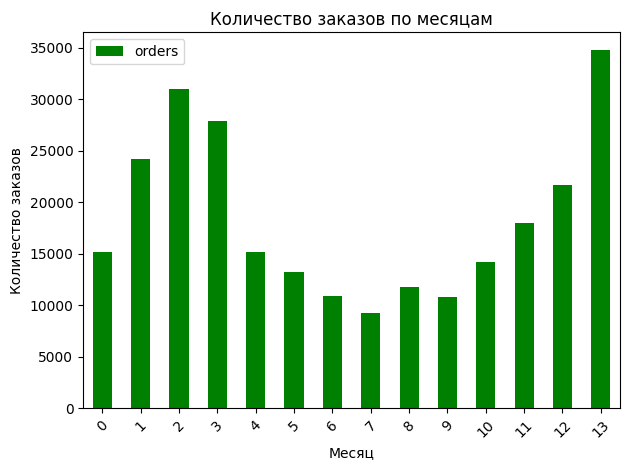

In [ ]:
aff_orders['month'] = aff_orders['created_at'].dt.to_period('M')

# Группировка и подсчет заказов по месяцам
orders_per_month = aff_orders.groupby('month',as_index = False).agg({'id':'count'})
orders_per_month.rename(columns = {'id':'orders'},inplace = True )
plt.figure(figsize=(10, 6))
orders_per_month.plot(kind='bar', color='green')
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Рост в за тот же период май/июнь

In [ ]:
21630/15138

1.4288545382481173

In [ ]:
34757/24188

1.4369522077063006

График привлеченных по месяцам за все время

<Figure size 2400x15000 with 0 Axes>

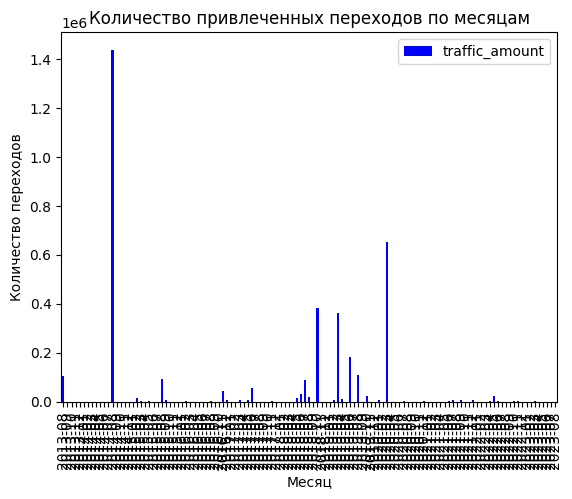

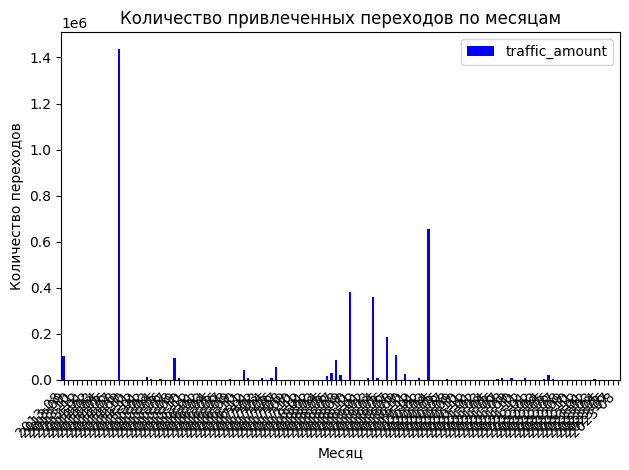

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


aff['created_at'] = pd.to_datetime(aff['created_at'])

# Создание столбца с месяцем и годом
aff['month'] = aff['created_at'].dt.to_period('M')

# Группировка и подсчет привлеченных переходов по месяцам
traffic_per_month = pd.DataFrame(aff.groupby('month')['traffic_amount'].sum())
plt.figure(figsize=(24, 150))
traffic_per_month.plot(kind='bar', color='blue')
plt.title('Количество привлеченных переходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество переходов')
plt.show()

traffic_per_month.plot(kind='bar', color='blue')
plt.title('Количество привлеченных переходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество переходов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

short_month_names = [calendar.month_abbr[m.month] for m in traffic_per_month.index]
plt.xticks(range(len(traffic_per_month)), short_month_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Расчет переходов по месяцам за последний год

<ipython-input-155-cae40e44bbd5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = filtered_data['created_at'].dt.to_period('M')


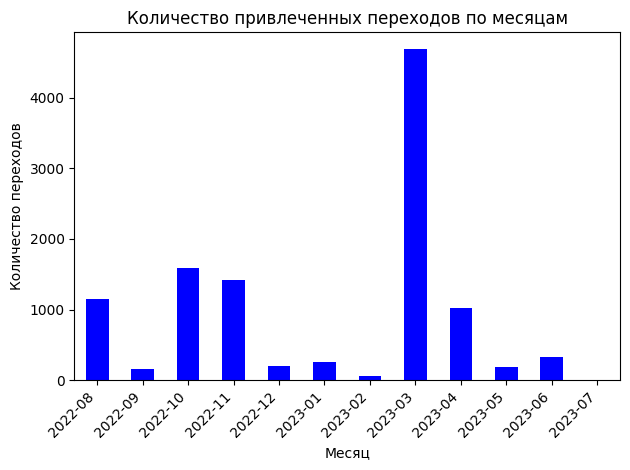

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


aff['created_at'] = pd.to_datetime(aff['created_at'])

start_date = pd.Timestamp('2022-08-01')
end_date = pd.Timestamp('2023-07-31')

# Фильтрация данных
filtered_data = aff[(aff['created_at'] >= start_date) & (aff['created_at'] <= end_date)]
# Создание столбца с месяцем и годом
filtered_data['month'] = filtered_data['created_at'].dt.to_period('M')
traffic_per_month = filtered_data.groupby('month')['traffic_amount'].sum()
traffic_per_month.plot(kind='bar', color='blue')
plt.title('Количество привлеченных переходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество переходов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
